In [1]:

import os
import datetime as dt
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [2]:
# Load the data in excel file

zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/electrcity_price_forecasting/CAISO.zip',
    fname='CAISO.csv.zip',
    extract=True)
csv_path, _ = os.path.splitext(zip_path)

278528/272351 [==============================] - 0s 0us/step


In [4]:
df = pd.read_csv(csv_path)
df.head()

,Date,price,IMF1,IMF2,IMF3,IMF4
0,1/1/2020 0:00,34.16538,31.251551,2.187268,-0.146083,-0.177955
1,1/1/2020 1:00,31.54142,31.251265,0.937542,0.143523,0.427832
2,1/1/2020 2:00,32.68844,31.251783,-0.846304,0.150892,-0.420917
3,1/1/2020 3:00,31.66949,31.250960,-2.149268,-0.145249,0.158213
4,1/1/2020 4:00,31.09839,31.248494,-2.225234,-0.150020,0.209181


In [5]:
df.describe()

,price,IMF1,IMF2,IMF3,IMF4
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,36.788542,36.641521,0.000189,0.000047,0.000021
std,61.616938,26.458516,10.999987,5.978833,2.874178
min,-10.256780,12.815655,-99.905110,-43.313197,-28.799968
25%,22.636920,24.644633,-2.221122,-0.822264,-0.485447
50%,29.931420,31.119330,-0.000961,-0.000977,-0.001427
75%,39.535220,40.341628,2.209046,0.822712,0.480165
max,1536.414300,280.823936,102.665304,43.867922,27.811987


In [6]:
# Convert to datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
df.head()

,Date,price,IMF1,IMF2,IMF3,IMF4
0,2020-01-01 00:00:00,34.16538,31.251551,2.187268,-0.146083,-0.177955
1,2020-01-01 01:00:00,31.54142,31.251265,0.937542,0.143523,0.427832
2,2020-01-01 02:00:00,32.68844,31.251783,-0.846304,0.150892,-0.420917
3,2020-01-01 03:00:00,31.66949,31.250960,-2.149268,-0.145249,0.158213
4,2020-01-01 04:00:00,31.09839,31.248494,-2.225234,-0.150020,0.209181


In [8]:
# Add three column. these are hour of the day, days of the month, and boolean value for week days (0) and week end(1)
df['hour'] = df['Date'].dt.hour
#df['week_end'] = ((df['Datetime'].dt.dayofweek)//5 == 1).astype(float)
df['week_end'] = ((df['Date'].dt.dayofweek)//5 == 1).astype(int)
#df['day_of_month'] = df['Datetime'].dt.day

In [9]:
# Seasons to use later
Spring = df.loc[(df.Date.dt.month==3) | (df.Date.dt.month==4) | (df.Date.dt.month==5)]
Summer = df.loc[(df.Date.dt.month==6) | (df.Date.dt.month==7) | (df.Date.dt.month==8)]
Fall = df.loc[(df.Date.dt.month==9) | (df.Date.dt.month==10) | (df.Date.dt.month==11)]
Winter = df.loc[(df.Date.dt.month==12) | (df.Date.dt.month==1) | (df.Date.dt.month==2)]

In [10]:
type(Spring)

pandas.core.frame.DataFrame

In [11]:
print(len(Spring))
print(len(Summer))
print(len(Fall))
print(len(Winter))

2207
2208
2185
2184


In [12]:
df.describe()

,price,IMF1,IMF2,IMF3,IMF4,hour,week_end
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,36.788542,36.641521,0.000189,0.000047,0.000021,11.499772,0.284039
std,61.616938,26.458516,10.999987,5.978833,2.874178,6.922926,0.450981
min,-10.256780,12.815655,-99.905110,-43.313197,-28.799968,0.000000,0.000000
25%,22.636920,24.644633,-2.221122,-0.822264,-0.485447,5.750000,0.000000
50%,29.931420,31.119330,-0.000961,-0.000977,-0.001427,11.500000,0.000000
75%,39.535220,40.341628,2.209046,0.822712,0.480165,17.250000,1.000000
max,1536.414300,280.823936,102.665304,43.867922,27.811987,23.000000,1.000000


In [13]:
df.head()

,Date,price,IMF1,IMF2,IMF3,IMF4,hour,week_end
0,2020-01-01 00:00:00,34.16538,31.251551,2.187268,-0.146083,-0.177955,0,0
1,2020-01-01 01:00:00,31.54142,31.251265,0.937542,0.143523,0.427832,1,0
2,2020-01-01 02:00:00,32.68844,31.251783,-0.846304,0.150892,-0.420917,2,0
3,2020-01-01 03:00:00,31.66949,31.250960,-2.149268,-0.145249,0.158213,3,0
4,2020-01-01 04:00:00,31.09839,31.248494,-2.225234,-0.150020,0.209181,4,0


In [14]:
# Check 100 rows. Look for week days and week end!
df[:100]

,Date,price,IMF1,IMF2,IMF3,IMF4,hour,week_end
0,2020-01-01 00:00:00,34.16538,31.251551,2.187268,-0.146083,-0.177955,0,0
1,2020-01-01 01:00:00,31.54142,31.251265,0.937542,0.143523,0.427832,1,0
2,2020-01-01 02:00:00,32.68844,31.251783,-0.846304,0.150892,-0.420917,2,0
3,2020-01-01 03:00:00,31.66949,31.250960,-2.149268,-0.145249,0.158213,3,0
4,2020-01-01 04:00:00,31.09839,31.248494,-2.225234,-0.150020,0.209181,4,0
...,...,...,...,...,...,...,...,...
95,2020-01-04 23:00:00,33.73182,33.546038,1.678614,-0.147352,-0.251813,23,1
96,2020-01-05 00:00:00,34.71220,33.591837,2.879064,0.137301,-0.274494,0,1
97,2020-01-05 01:00:00,31.84386,33.639566,2.383185,0.117481,0.632278,1,1
98,2020-01-05 02:00:00,31.58339,33.691022,0.473740,-0.150810,-0.622964,2,1


In [15]:
# check datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      8784 non-null   datetime64[ns]
 1   price     8784 non-null   float64       
 2   IMF1      8784 non-null   float64       
 3   IMF2      8784 non-null   float64       
 4   IMF3      8784 non-null   float64       
 5   IMF4      8784 non-null   float64       
 6   hour      8784 non-null   int64         
 7   week_end  8784 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 549.1 KB


In [20]:
# convert format and pop date time
date_time = pd.to_datetime(df.pop('Date'), format='%Y/%m/%d %H:%M:%S')

In [21]:
df.head()

,price,IMF1,IMF2,IMF3,IMF4,hour,week_end
0,34.16538,31.251551,2.187268,-0.146083,-0.177955,0,0
1,31.54142,31.251265,0.937542,0.143523,0.427832,1,0
2,32.68844,31.251783,-0.846304,0.150892,-0.420917,2,0
3,31.66949,31.250960,-2.149268,-0.145249,0.158213,3,0
4,31.09839,31.248494,-2.225234,-0.150020,0.209181,4,0


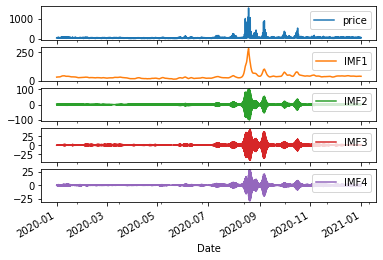

In [23]:
# Plot few features over time (completet data)

plot_cols = ['price','IMF1','IMF2','IMF3','IMF4']
#plot_cols = ['price','IM1','IM2','IM3','IM4','IM5','IM6','IM7','IM8']
plot_features = df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

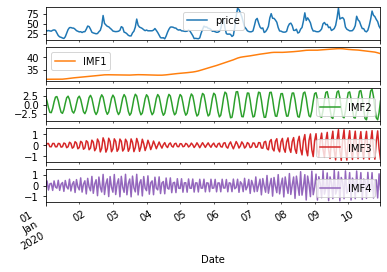

In [24]:
# Plot for 10 days
plot_features = df[plot_cols][:240]
plot_features.index = date_time[:240]
_ = plot_features.plot(subplots=True)


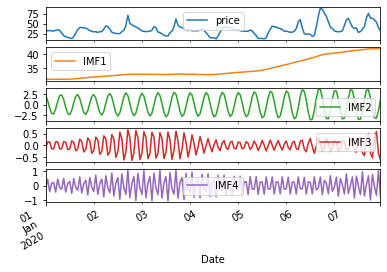

In [25]:
# Plot for 10 days
plot_features = Winter[plot_cols][:168]
plot_features.index = date_time[:168]
_ = plot_features.plot(subplots=True)

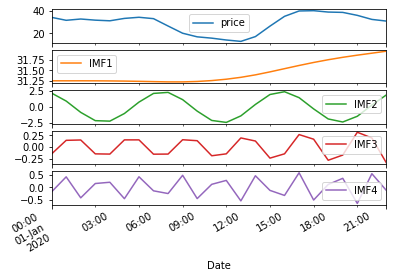

In [26]:
# Plot for 1 days
plot_features = df[plot_cols][:24]
plot_features.index = date_time[:24]
_ = plot_features.plot(subplots=True)

In [27]:
# Check the statistics of this dataset
#df.describe(include = 'all')
df.describe()
#df.describe().transpose()

,price,IMF1,IMF2,IMF3,IMF4,hour,week_end
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,36.788542,36.641521,0.000189,0.000047,0.000021,11.499772,0.284039
std,61.616938,26.458516,10.999987,5.978833,2.874178,6.922926,0.450981
min,-10.256780,12.815655,-99.905110,-43.313197,-28.799968,0.000000,0.000000
25%,22.636920,24.644633,-2.221122,-0.822264,-0.485447,5.750000,0.000000
50%,29.931420,31.119330,-0.000961,-0.000977,-0.001427,11.500000,0.000000
75%,39.535220,40.341628,2.209046,0.822712,0.480165,17.250000,1.000000
max,1536.414300,280.823936,102.665304,43.867922,27.811987,23.000000,1.000000


In [28]:
# Similarly the Date Time column is very useful, but not in this string form. Start by converting it to seconds

timestamp_s = date_time.map(dt.datetime.timestamp)

In [29]:
# A simple approach to convert it to a usable signal is to use sin and cos to convert the time to clear "Time of day" and "Time of year" signals

#hours = 60*60
day = 24*60*60
year = (365.2425)*day

#df['Hour sin'] = np.sin(timestamp_s * (2 * np.pi / hours))
#df['Hour cos'] = np.cos(timestamp_s * (2 * np.pi / hours))
df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
df['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

Text(0.5, 1.0, 'Time of day signal')

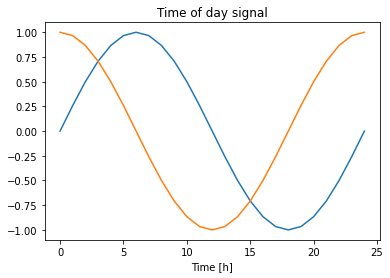

In [30]:
# plot the above signals (a day)

plt.plot(np.array(df['Day sin'])[:25])
plt.plot(np.array(df['Day cos'])[:25])
plt.xlabel('Time [h]')
plt.title('Time of day signal')

Text(0.5, 1.0, 'Time of Year signal')

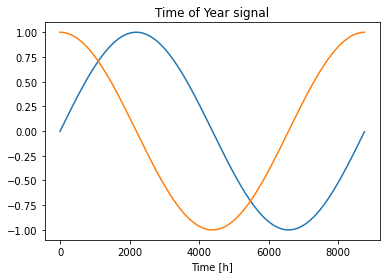

In [31]:
# Plot year data

plt.plot(np.array(df['Year sin'])[:8760])
plt.plot(np.array(df['Year cos'])[:8760])
plt.xlabel('Time [h]')
plt.title('Time of Year signal')

In [32]:
df.head()

,price,IMF1,IMF2,IMF3,IMF4,hour,week_end,Day sin,Day cos,Year sin,Year cos
0,34.16538,31.251551,2.187268,-0.146083,-0.177955,0,0,-7.670342e-12,1.000000,-2.150345e-03,0.999998
1,31.54142,31.251265,0.937542,0.143523,0.427832,1,0,2.588190e-01,0.965926,-1.433564e-03,0.999999
2,32.68844,31.251783,-0.846304,0.150892,-0.420917,2,0,5.000000e-01,0.866025,-7.167823e-04,1.000000
3,31.66949,31.250960,-2.149268,-0.145249,0.158213,3,0,7.071068e-01,0.707107,1.964387e-15,1.000000
4,31.09839,31.248494,-2.225234,-0.150020,0.209181,4,0,8.660254e-01,0.500000,7.167823e-04,1.000000


In [33]:
# I use a (70%, 20%, 10%) split for the training, validation, and test sets. Note the data is not being randomly shuffled before splitting

#print(df.columns)
column_indices = {name: i for i, name in enumerate(df.columns)}
#print(column_indices)
n = len(df)
print("Total Data:",n)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

# check how many fro train/validation/test
print("Train Data:",len(train_df))
print("Validation Data",len(val_df))
print("Test Data:",len(test_df))

# Check number of features in the data frame columns (df.shape[1]). Data frame works like (row, column) = (0,1)
dataframe = df.shape
print(dataframe)
num_features = df.shape[1]

Total Data: 8784
Train Data: 6148
Validation Data 1757
Test Data: 879
(8784, 11)


In [34]:
# Normalize the data
# It is important to scale features before training a neural network. Normalization is a common way of doing this scaling. Subtract the mean and divide by the standard deviation of each feature.
# The mean and standard deviation should only be computed using the training data so that the models have no access to the values in the validation and test sets.
# Standardization(Z-score normalization) is the subtraction of the mean and then dividing by its standard deviation.

train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

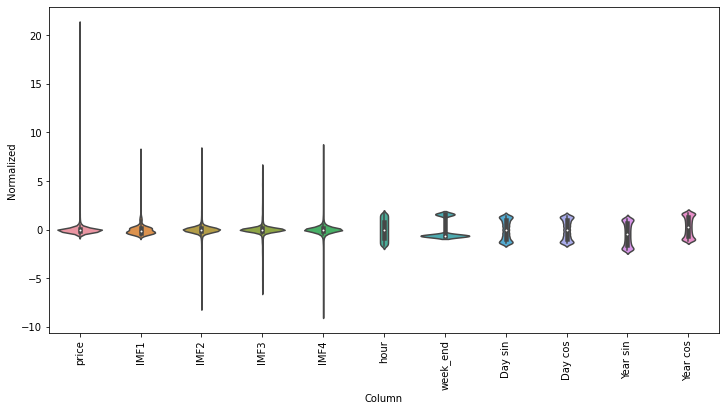

In [36]:
# Plot to check
# Now peek at the distribution of the features. Price do have long tails, but there are no obvious errors.
df_std = (df - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)

In [37]:
# Wnidow Generator
# Indexes and offsets
# Create the WindowGenerator class. The __init__ method includes all the necessary logic for the input and label indices.

class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)} # only consider train dataset

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [38]:
OUT_STEPS = 24

w1 = WindowGenerator(input_width=168, label_width=OUT_STEPS, shift=OUT_STEPS,
                     label_columns=['price'])
w1

Total window size: 192
Input indices: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167]
Label indices: [168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185
 186 187 188 189 190 191]
Label column name(s): ['price']

In [39]:
# split window

def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [40]:
# Lets see!
# Stack three slices, the length of the total window:
example_window = tf.stack([np.array(train_df[:w1.total_window_size]),
                           np.array(train_df[100:100+w1.total_window_size]),
                           np.array(train_df[200:200+w1.total_window_size])])


example_inputs, example_labels = w1.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 192, 11)
Inputs shape: (3, 168, 11)
labels shape: (3, 24, 1)


In [41]:
# plot to observe

w1.example = example_inputs, example_labels


In [42]:
# design plot methods

def plot(self, model=None, plot_col='price', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(3, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [h]')

WindowGenerator.plot = plot

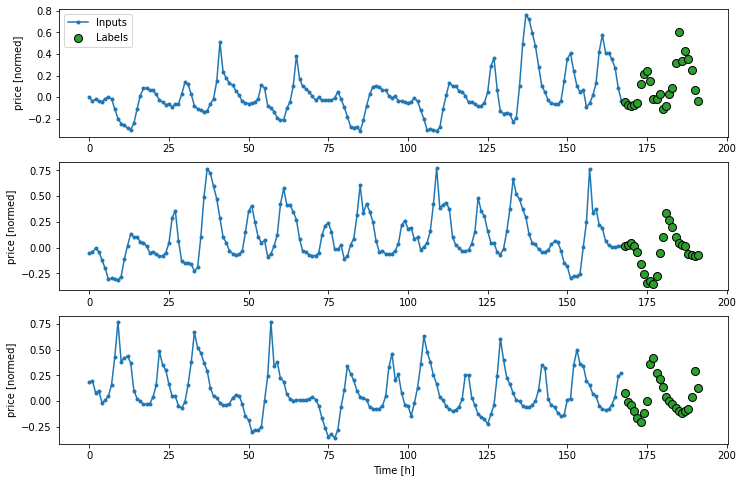

In [43]:
# Lets plot 

w1.plot()

In [45]:
# Create Datasets
# This make_dataset method will take a time series DataFrame and convert it to a tf.data.Dataset of (input_window, label_window) pairs using the preprocessing.timeseries_dataset_from_array function.

def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  print(data.shape)
  ds = tf.keras.preprocessing.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=168)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [46]:
# The WindowGenerator object holds training, validation and test data. 
# Add properties for accessing them as tf.data.Datasets using the above make_dataset method.

@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [47]:
# Each element is an (inputs, label) pair
w1.train.element_spec

(6148, 11)


(TensorSpec(shape=(None, 168, 11), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 24, 1), dtype=tf.float32, name=None))

In [48]:
# Iterating over a Dataset yields concrete batches

for example_inputs, example_labels in w1.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

(6148, 11)
Inputs shape (batch, time, features): (168, 168, 11)
Labels shape (batch, time, features): (168, 24, 1)


In [49]:
# The training procedure into a function. This will enhance reusability

MAX_EPOCHS = 150

#def compile_and_fit(model, window, patience=2):
def compile_and_fit(model, window):
  #early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
  #                                                  patience=patience,
  #                                                  mode='min')

  model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.MeanAbsoluteError()]
                #metrics=['accuracy']
                )

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,)
                      #callbacks=[early_stopping])
  return history

In [58]:
# multiple feature prediction
lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units]
    # Adding more `lstm_units` just overfits more quickly.
    tf.keras.layers.LSTM(32, return_sequences=False),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros), # Initializer that generates tensors initialized to 0.
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
    #tf.keras.layers.Reshape([OUT_STEPS, 1])
])

In [ ]:
# multiple feature prediction
lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units]
    # Adding more `lstm_units` just overfits more quickly.
    tf.keras.layers.LSTM(32, return_sequences=True),
    #tf.keras.layers.LSTM(16, return_sequences=False, activation='relu'),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
    #tf.keras.layers.Dense(units=1)
])

In [52]:
# single feature prediction
# An RNN layer called Long Short Term Memory (LSTM)
# With return_sequences=True the model can be trained on 24h of data at a time

lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

In [59]:
print('Input shape:', w1.example[0].shape)
print('Output shape:', lstm_model(w1.example[0]).shape)

Input shape: (168, 168, 11)
Output shape: (168, 24, 11)


In [60]:
lstm_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (168, 32)                 5632      
_________________________________________________________________
dense_3 (Dense)              (168, 264)                8712      
_________________________________________________________________
reshape_2 (Reshape)          (168, 24, 11)             0         
Total params: 14,344
Trainable params: 14,344
Non-trainable params: 0
_________________________________________________________________


In [61]:
# Train / batch = 36
val_performance = {}
performance = {}

history = compile_and_fit(lstm_model, w1)

IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate(w1.val)
performance['LSTM'] = lstm_model.evaluate(w1.test, verbose=2)

(1757, 11)
10/10 [==============================] - 0s 35ms/step - loss: 0.1526 - mean_absolute_error: 0.1859
(879, 11)
5/5 - 0s - loss: 0.0128 - mean_absolute_error: 0.0871


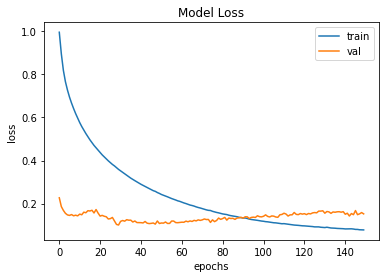

In [62]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(['train', 'val'], loc='upper right')

#plt.plot(history.history['acc'])
#plt.plot(history.history['val_loss'])

In [ ]:
val_performance
performance


{'LSTM': [0.011709769256412983, 0.08368797600269318]}

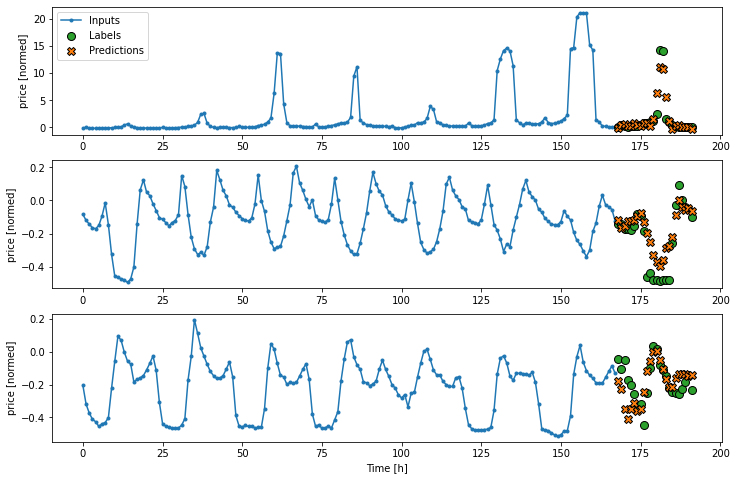

In [63]:
w1.plot(lstm_model)

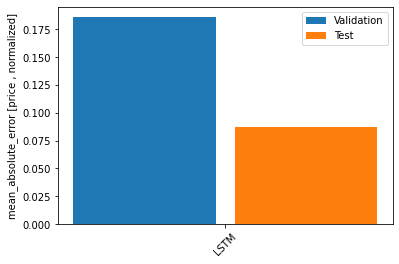

In [64]:
# Performance

x = np.arange(len(performance))
width = 0.3
metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.ylabel('mean_absolute_error [price , normalized]')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()

In [65]:
for name, value in performance.items():
  print(f'{name:12s}: {value[1]:0.4f}')

LSTM        : 0.0871


In [66]:
# Prediction on new data
#data_predict = lstm_model.predict(test)
#test_df.shape
#w1.test.element_spec
#X = [3,24, 6]
lstm_model.predict(w1.test)

(879, 11)


array([[[ 0.08084479,  0.08084479,  0.08084479, ...,  0.08084479,
          0.08084479,  0.08084479],
        [ 0.00899407,  0.00899407,  0.00899407, ...,  0.00899407,
          0.00899407,  0.00899407],
        [-0.01555857, -0.01555857, -0.01555857, ..., -0.01555857,
         -0.01555857, -0.01555857],
        ...,
        [ 0.3193608 ,  0.3193608 ,  0.3193608 , ...,  0.3193608 ,
          0.3193608 ,  0.3193608 ],
        [ 0.358075  ,  0.358075  ,  0.358075  , ...,  0.358075  ,
          0.358075  ,  0.358075  ],
        [ 0.24801007,  0.24801007,  0.24801007, ...,  0.24801001,
          0.24801001,  0.24801001]],

       [[ 0.38204095,  0.38204095,  0.38204095, ...,  0.38204095,
          0.38204095,  0.38204095],
        [ 0.3349545 ,  0.3349545 ,  0.3349545 , ...,  0.3349545 ,
          0.3349545 ,  0.3349545 ],
        [ 0.29293653,  0.29293653,  0.29293653, ...,  0.29293653,
          0.29293653,  0.29293653],
        ...,
        [-0.06847847, -0.06847847, -0.06847847, ..., -